In [1]:
import torch.nn as nn
from torchvision import transforms
import pytorch_lightning as pl
import torch

from ssl_methods.data_modules import ReconstructionDataModule
from ssl_methods.latent_flow.train_module import LatentFlowPretrainingModule

In [2]:
preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

data_module = ReconstructionDataModule("../data", preprocess, batch_size=8)
data_module.setup()

training_module = LatentFlowPretrainingModule.load_from_checkpoint("../models/big-flow/latent-flow-large-2.ckpt")

In [3]:
import matplotlib.pyplot as plt

In [4]:
dl = data_module.train_dataloader()

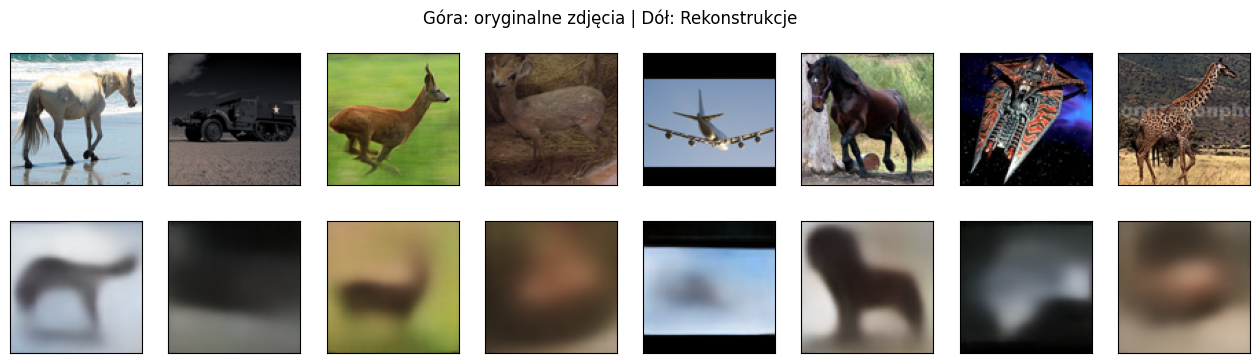

In [17]:
device = "cuda"

with torch.no_grad():
    data_iter = iter(dl)
    images, _ = next(data_iter)
    images = images.to(device, dtype=torch.float32)
    z = training_module.encoder(images)
    recons = training_module.decoder(z)

    images = images.cpu()
    recons = recons.cpu()

    images = images * 255
    recons = recons * 255

    images = images.byte()
    recons = recons.byte()

    # Plot original images
    fig, axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(16, 4))
    for imgs, row in zip([images, recons], axes):
        for img, ax in zip(imgs, row):
            ax.imshow(img.permute(1, 2, 0).numpy().astype('uint8'))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    fig.suptitle('Góra: oryginalne zdjęcia | Dół: Rekonstrukcje')
    plt.show()